# Pachete necesare pentru folosirea acestui Notebook

Vom folosi [scipy](https://scipy.org/), [numpy](https://numpy.org/) și [matplotlib](https://matplotlib.org/).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc, ndimage
from scipy.fft import dctn, idctn
import matplotlib.image as img


# Imaginea cu care lucrăm

Vom folosi o imagine din setul de date oferit implicit de către scipy.

C:\Users\40773\AppData\Local\Temp\ipykernel_24076\3992004096.py:1: DeprecationWarning: scipy.misc.ascent has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.ascent instead.
  X = misc.ascent()


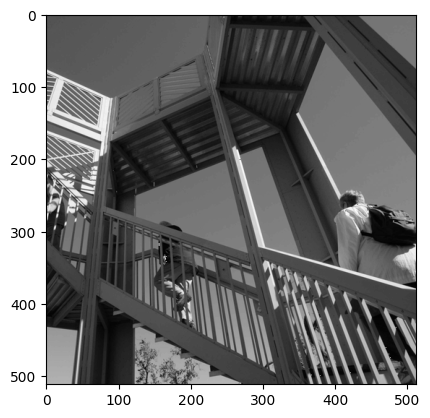

In [2]:
X = misc.ascent()
plt.imshow(X, cmap=plt.cm.gray)
plt.show()

# Transformata DCT a unei imagini

Transformata DCT se extinde la mai multe dimensiuni similar cu transformata DFT. Pentru un semnal bidimensional, precum o imagine, DCT-II devine:

$$
Y_{m_1,m_2} = \sum_{n_1=0}^{N_1-1}
              \sum_{n_2=0}^{N_2-1}
              x_{n_1,n_2}
              \cos\left[\frac{\pi}{N_1}m_1
                \left(n_1 + \frac12\right)\right]
              \cos\left[\frac{\pi}{N_2}m_2\left(n_2 + \frac12\right)\right]
$$

* unde $n_1$ și $n_2$ sunt pozițile pixelilor pe orizontală, respectiv, pe verticală
* bin-urile rezultate corespund pozițiilor pixelilor
* spectrul este în continuare simetric și par
* proprietățile transformatei DCT-II sunt respectate și în cazul celei 2D

În Python avem rutina `scipy.fft.dct` pentru 1D și `scipy.fft.dctn` pentru generalizarea la semnale $n$-dimensionale. Dimensiunea este determinată automat după forma semnalului; tipul DCT poate fi specificat prin atributul `type` (implicit II).

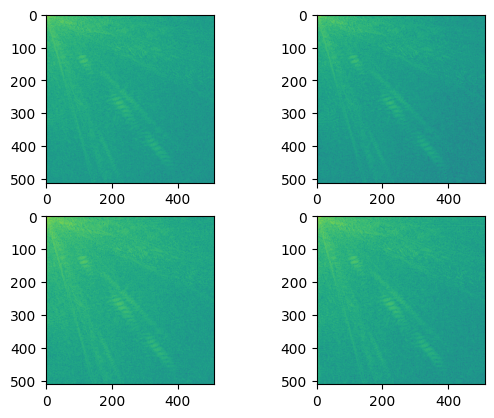

In [4]:
Y1 = dctn(X, type=1)
Y2 = dctn(X, type=2)
Y3 = dctn(X, type=3)
Y4 = dctn(X, type=4)
freq_db_1 = 20*np.log10(abs(Y1))
freq_db_2 = 20*np.log10(abs(Y2))
freq_db_3 = 20*np.log10(abs(Y3))
freq_db_4 = 20*np.log10(abs(Y4))

plt.subplot(221).imshow(freq_db_1)
plt.subplot(222).imshow(freq_db_2)
plt.subplot(223).imshow(freq_db_3)
plt.subplot(224).imshow(freq_db_4)
plt.show()

# Compactarea energiei. Compresie.

Putem profita de proprietatea compresiei energiei prin anularea frecvențelor DCT începând cu *bin*-ul `k` după care aplicăm transformata DCT inversă (similar cu tema anterioară):

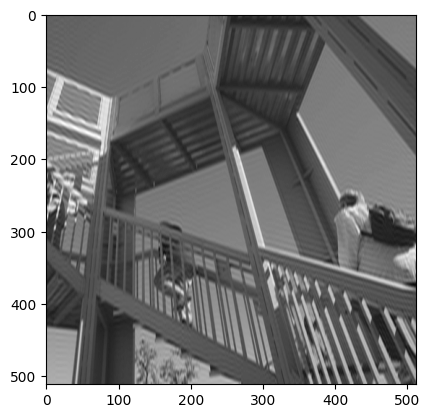

In [5]:
k = 120

Y_ziped = Y2.copy()
Y_ziped[k:] = 0
X_ziped = idctn(Y_ziped)

plt.imshow(X_ziped, cmap=plt.cm.gray)
plt.show()

# JPEG

Algoritmul de compresie JPEG are patru etape:

1. transformarea imaginii din pixeli RGB în Y'CbCr
2. aplicarea 2D-DCT pe blocuri disincte de 8x8 pixeli din imagine
3. cuantizarea în frecvență cu $Q$ dat de standardul JPEG
4. opțional compresia rezultatului cu coduri Huffman

Unde matricea JPEG de cuantizare $Q$ este:
$$
Q =
\begin{bmatrix}
16 & 11 & 10 & 16 & 24 & 40 & 51 & 61 & \\
12 & 12 & 14 & 19 & 26 & 28 & 60 & 55 & \\
14 & 13 & 16 & 24 & 40 & 57 & 69 & 56 & \\
14 & 17 & 22 & 29 & 51 & 87 & 80 & 62 & \\
18 & 22 & 37 & 56 & 68 & 109 & 103 & 77 & \\
24 & 35 & 55 & 64 & 81 & 104 & 113 & 92 & \\
49 & 64 & 78 & 87 & 103 & 121 & 120 & 101\\
72 & 92 & 95 & 98 & 112 & 100 & 103 & 99\\
\end{bmatrix}
$$

Imaginea noastră de test este monocromă, deci nu necesită pasul 1, dar putem efectua o operație de *down-sampling* în preprocesare precum am prezentat la curs.

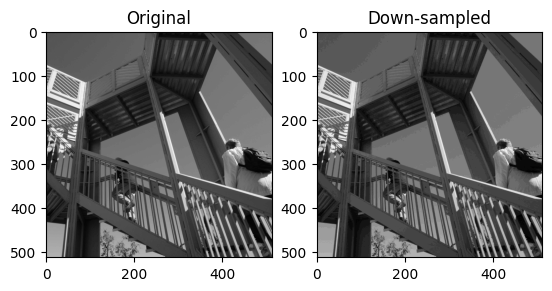

In [37]:
Q_down = 10

X_jpeg = X.copy()
X_jpeg = Q_down*np.round(X_jpeg/Q_down);

plt.subplot(121).imshow(X, cmap=plt.cm.gray)
plt.title('Original')
plt.subplot(122).imshow(X_jpeg, cmap=plt.cm.gray)
plt.title('Down-sampled')
plt.show()

Pentru fiecare bloc de $8\times 8$ aplică DCT și cuantizare.

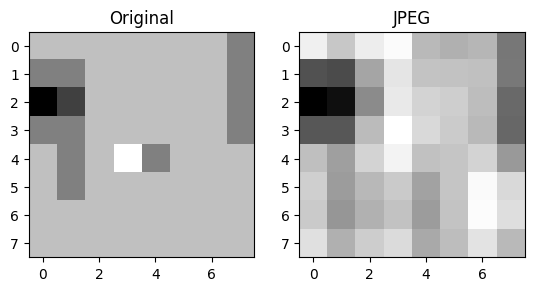

Componente în frecvență:64
Componente în frecvență după cuantizare: 14


In [3]:
Q_jpeg = [[16, 11, 10, 16, 24, 40, 51, 61],
          [12, 12, 14, 19, 26, 28, 60, 55],
          [14, 13, 16, 24, 40, 57, 69, 56],
          [14, 17, 22, 29, 51, 87, 80, 62],
          [18, 22, 37, 56, 68, 109, 103, 77],
          [24, 35, 55, 64, 81, 104, 113, 92],
          [49, 64, 78, 87, 103, 121, 120, 101],
          [72, 92, 95, 98, 112, 100, 103, 99]]

# Encoding
x = X[:8, :8]
y = dctn(x)
y_jpeg = Q_jpeg*np.round(y/Q_jpeg)

# Decoding
x_jpeg = idctn(y_jpeg)

# Results
y_nnz = np.count_nonzero(y)
y_jpeg_nnz = np.count_nonzero(y_jpeg)

plt.subplot(121).imshow(x, cmap=plt.cm.gray)
plt.title('Original')
plt.subplot(122).imshow(x_jpeg, cmap=plt.cm.gray)
plt.title('JPEG')
plt.show()

print('Componente în frecvență:' + str(y_nnz) +
      '\nComponente în frecvență după cuantizare: ' + str(y_jpeg_nnz))

# Sarcini

1. [6p] Completați algoritmul JPEG incluzând toate blocurile din imagine.

2. [4p] Extindeți la imagini color (incluzând transformarea din RGB în Y'CbCr). Exemplificați pe `scipy.misc.face` folosită în tema anterioară.

3. [6p] Extindeți algoritmul pentru compresia imaginii până la un prag MSE impus de utilizator.

4. [4p] Extindeți algoritmul pentru compresie video. Demonstrați pe un clip scurt din care luați fiecare cadru și îl tratați ca pe o imagine.

C:\Users\40773\AppData\Local\Temp\ipykernel_24076\1280091538.py:98: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  image = misc.face().copy()


0.0
4025.9975318413203
2564.586233119584
2283.2661769395972
2405.6171518634137
2515.2853032584435
2718.2590985133456
3146.5139246007893
3232.751866300729
3821.200116032579
4430.02010916929
4605.673295537943
4845.126325448833
5313.617506048184
5900.733245195096
6526.368779786738
7170.36614699895
7836.68535064999
8550.618897161463
9119.938077838638
9921.951001036936
10165.552402692978


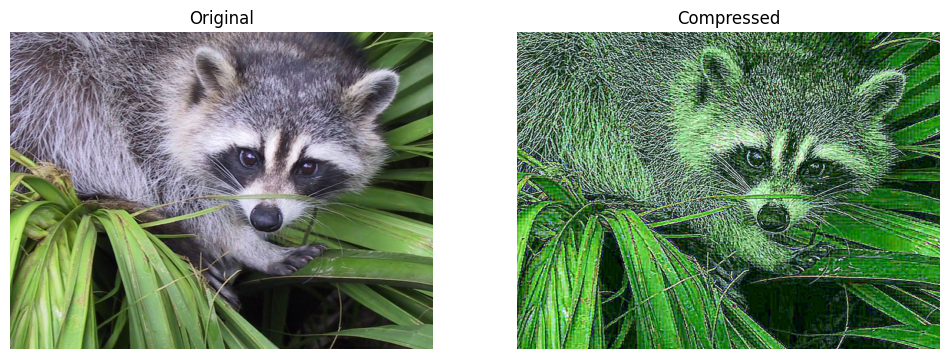

In [52]:


rgb_to_ycbcr = np.array([[0.299, 0.587, 0.114],
                         [-0.168736, -0.331264, 0.5],
                         [0.5, -0.418688, -0.081312]])

ycbcr_to_rgb = np.array([[1, 0, 1.402],
                         [1, -0.344136, -0.714136],
                         [1, 1.772, 0]])

offset = np.array([0, 128, 128])

def transform_rgb_to_ycbcr(X: np.array) -> np.array:
     X = X @ rgb_to_ycbcr.T + offset
     return np.clip(X, 0, 255).astype(np.uint8)

def transform_ycbcr_to_rgb(X: np.array) -> np.array:
     X = (X - offset) @ ycbcr_to_rgb.T
     return np.clip(X, 0, 255).astype(np.uint8)

def apply_padding(X: np.array) -> np.array:
    height, width = X.shape
    height_diff = (8 - height % 8) % 8
    width_diff = (8 - width % 8) % 8

    X = np.pad(X, ((0, height_diff), (0, width_diff)), mode='constant', constant_values=0)

    return X

def encode_block(X, Q):
    Y = dctn(X, norm='ortho')
    Y_jpeg = Q * np.round(Y / Q)
    return np.clip(idctn(Y_jpeg, norm='ortho'), 0, 255).astype(np.uint8)

def encode_channel(X: np.array, Q: np.array) -> np.array:
    height, width = X.shape
    Y = np.zeros((height, width))

    for i in range(0, height, 8):
        for j in range(0, width, 8):
            Y[i:i+8, j:j+8] = encode_block(X[i:i+8, j:j+8], Q)

    return Y


def jpeg_compress(X: np.array, MSE: float, use_MSE: bool) -> np.array:
    Q_y = np.array([[16, 11, 10, 16, 24, 40, 51, 61],
       [12, 12, 14, 19, 26, 28, 60, 55],
       [14, 13, 16, 24, 40, 57, 69, 56],
       [14, 17, 22, 29, 51, 87, 80, 62],
       [18, 22, 37, 56, 68, 109, 103, 77],
       [24, 35, 55, 64, 81, 104, 113, 92],
       [49, 64, 78, 87, 103, 121, 120, 101],
       [72, 92, 95, 98, 112, 100, 103, 99]])

    Q_c = np.array([[17, 18, 24, 47, 99, 99, 99, 99],
           [18, 21, 26, 66, 99, 99, 99, 99],
           [24, 26, 56, 99, 99, 99, 99, 99],
           [47, 66, 99, 99, 99, 99, 99, 99],
           [99, 99, 99, 99, 99, 99, 99, 99],
           [99, 99, 99, 99, 99, 99, 99, 99],
           [99, 99, 99, 99, 99, 99, 99, 99],
           [99, 99, 99, 99, 99, 99, 99, 99]])
    grayscale: bool = len(X.shape) == 2
    if len(X.shape) == 3:
        for i in range(3):
            X[:, :, i] = apply_padding(X[:, :, i])
    else:
        X = apply_padding(X)

    if use_MSE != True:
        MSE = 0

    compression_factor = 1
    X_copy = X.copy()
    Q_y_compress = Q_y.copy()
    Q_c_compress = Q_c.copy()
    while True:
        print(np.mean(X_copy - X) ** 2)

        if grayscale:
           Y = encode_channel(X, Q_y_compress)
           X = Y
        else:
            X_ycbcr = transform_rgb_to_ycbcr(X)
            Y_jpeg = []
            y, cr, cb = X_ycbcr[:, :, 0], X_ycbcr[:, :, 1], X_ycbcr[:, :, 2]
            X_reconstructed = np.dstack((encode_channel(y, Q_y_compress), encode_channel(cr, Q_c_compress), encode_channel(cb, Q_c_compress)))
            X = transform_ycbcr_to_rgb(X_reconstructed)

        compression_factor += 0.2
        Q_y_compress = Q_y * compression_factor
        Q_c_compress = Q_c * compression_factor
        if np.mean(X_copy - X) ** 2 > MSE:
            print(np.mean(X_copy - X) ** 2)
            return X








# Exercitiul 1

C:\Users\40773\AppData\Local\Temp\ipykernel_24076\2608564124.py:1: DeprecationWarning: scipy.misc.ascent has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.ascent instead.
  image = misc.ascent().copy()


0.0
0.12000701599754393


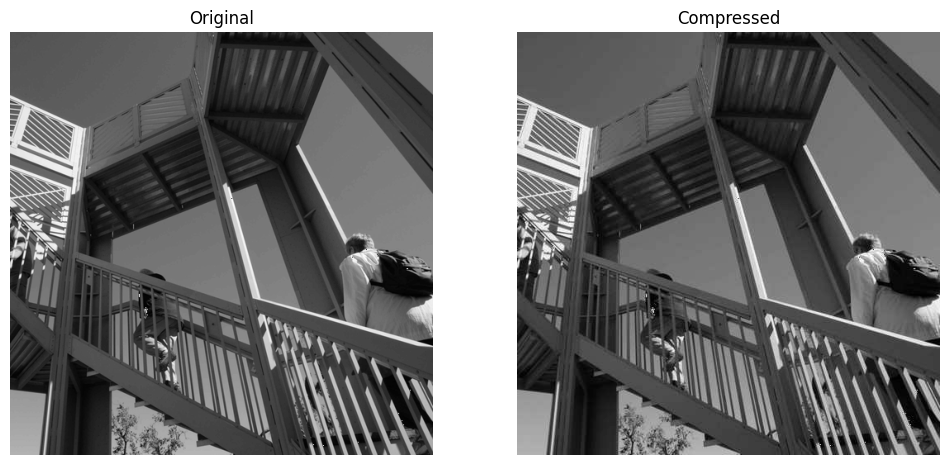

In [65]:
image = misc.ascent().copy()
image_compressed = jpeg_compress(image, 0, False)


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(image, cmap=plt.cm.gray)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Compressed")
plt.imshow(image_compressed, cmap=plt.cm.gray)
plt.axis("off")

plt.show()

from PIL import Image
im = Image.fromarray(image_compressed.astype(np.uint8), mode="L")
im.save("image_compressed_ex1.jpg")



# Exercitiul 2

C:\Users\40773\AppData\Local\Temp\ipykernel_24076\1341620338.py:1: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  image = misc.face().copy()


0.0
4025.9975318413203


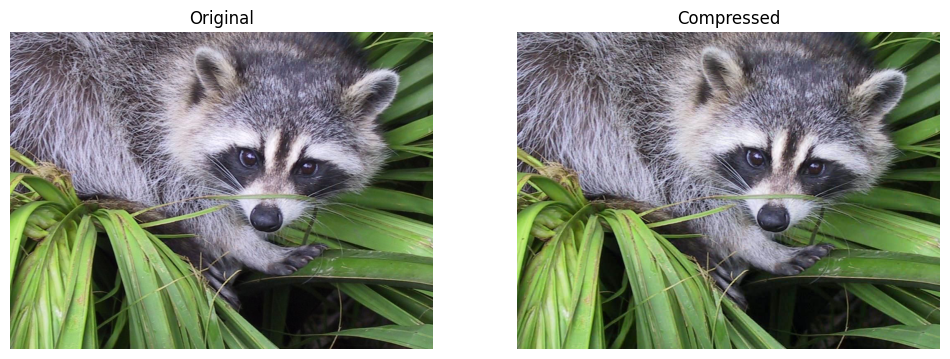

In [62]:
image = misc.face().copy()
image_compressed = jpeg_compress(image, 0, False)


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(image, cmap=plt.cm.gray)
# save image
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Compressed")
plt.imshow(image_compressed, cmap=plt.cm.gray)
plt.axis("off")

plt.show()

from PIL import Image


im = Image.fromarray(image_compressed)
im.save("image_compressed_ex2.jpg")



# Exercitiul 3 - Color

C:\Users\40773\AppData\Local\Temp\ipykernel_24076\3336029519.py:1: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  image = misc.face().copy()


0.0
4025.9975318413203
2564.586233119584
2283.2661769395972
2405.6171518634137
2515.2853032584435
2718.2590985133456
3146.5139246007893
3232.751866300729
3821.200116032579
4430.02010916929
4605.673295537943
4845.126325448833
5313.617506048184
5900.733245195096
6526.368779786738
7170.36614699895
7836.68535064999
8550.618897161463
9119.938077838638
9921.951001036936
10165.552402692978


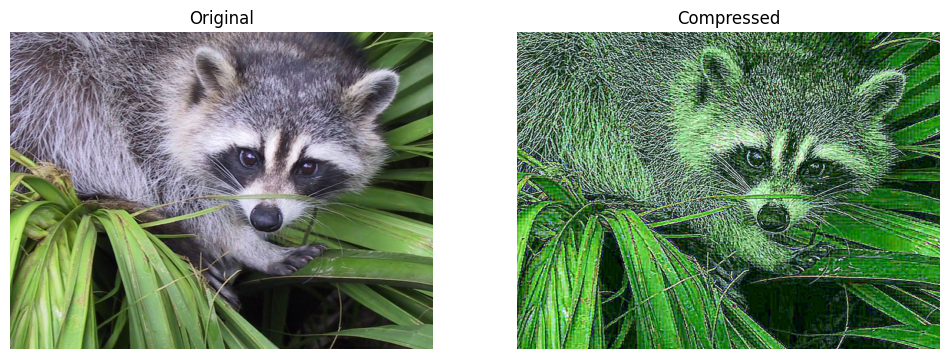

In [56]:
image = misc.face().copy()
image_compressed = jpeg_compress(image, 10000, True)


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(image, cmap=plt.cm.gray)
# save image
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Compressed")
plt.imshow(image_compressed, cmap=plt.cm.gray)
plt.axis("off")

plt.show()

from PIL import Image


im = Image.fromarray(image_compressed)
im.save("image_compressed_ex3_color.jpg")



# Exercitiul 3 - Grayscale

C:\Users\40773\AppData\Local\Temp\ipykernel_24076\361448999.py:1: DeprecationWarning: scipy.misc.ascent has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.ascent instead.
  image = misc.ascent().copy()


0.0
0.12000701599754393
0.7400538476795191
1.5623474158346653
2.928899862396065
3.764201537705958
5.315365569913411
7.646424102495075
8.675966834198334
10.184172978057177
11.939541943269433
12.078477875387762
11.11456156069471
9.47872880975774
8.254814823754714
6.1598996858956525
4.08877451956505
2.0619888097426156
0.1149111306440318
1.0557722420344362
6.29281676375831
15.363604399623
40.79709589021513
78.4172999393777
131.59715929121012


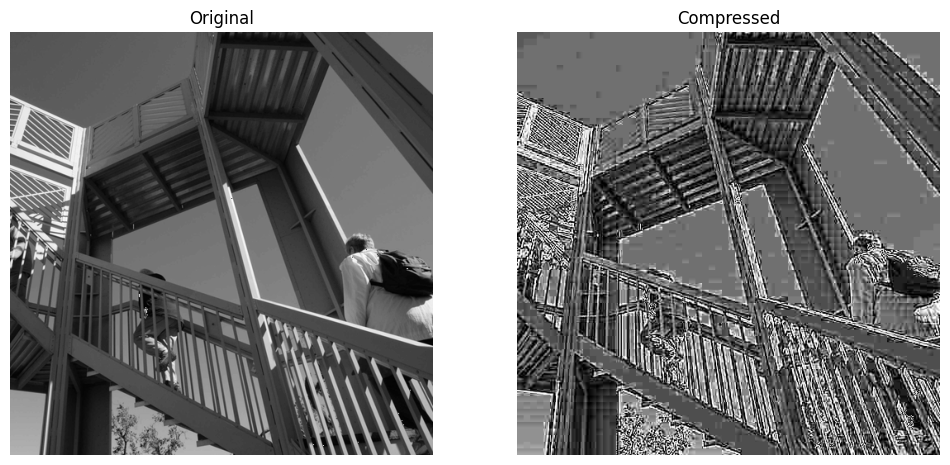

In [64]:
image = misc.ascent().copy()
image_compressed = jpeg_compress(image, 100, True)


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(image, cmap=plt.cm.gray)
# save image
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Compressed")
plt.imshow(image_compressed, cmap=plt.cm.gray)
plt.axis("off")

plt.show()

from PIL import Image

im = Image.fromarray(image_compressed.astype(np.uint8), mode="L")
im.save("image_compressed_ex3_grayscale.jpg")



# Exercitiul 4

In [80]:
import cv2

# MSE threshold
mse_threshold = 300

# Source: https://www.pexels.com/video
video = cv2.VideoCapture('input.mp4')

frames = []
fps = int(video.get(cv2.CAP_PROP_FPS))

frame_count = 0
             
while True:
    # frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    # frame = jpeg_compress(frame, mse_threshold, True)

    ret, frame = video.read()
    frame_count += 1

    frames.append(frame)
    
    if frame_count == 2 * fps or ret == 0:
        break

frames = np.array(frames)

video.release()

In [81]:
import subprocess as sp

# Check if ffmpeg is installed and play video
try:
    sp.check_call(['ffmpeg', '-version'])
    ffmpeg_proc = sp.Popen(['ffmpeg', '-y', '-f', 'image2pipe', '-vcodec', 'mjpeg', '-r', str(fps), '-i', '-', '-vcodec', 'libx264', '-q:v', '1', '-r', str(fps), 'compressed_video.mp4'], stdin=sp.PIPE)

    for i in range(len(frames)):
        frame = jpeg_compress(frames[i], 300, False)
        print(f'Progress = {(i + 1) / len(frames) * 100}%', flush=True)
        img = Image.fromarray(frame.astype('uint8'), mode='RGB')
        img.save(ffmpeg_proc.stdin, 'JPEG')

    ffmpeg_proc.stdin.close()
    ffmpeg_proc.wait()
except sp.CalledProcessError:
    print('ffmpeg not installed')

0.0
1622.2294438229296
Progress = 1.7241379310344827%
0.0
1531.2263318795613
Progress = 3.4482758620689653%
0.0
1458.3709517023242
Progress = 5.172413793103448%
0.0
1504.7751693528587
Progress = 6.896551724137931%
0.0
1501.5974703842912
Progress = 8.620689655172415%
0.0
1533.5612483957843
Progress = 10.344827586206897%
0.0
1483.00019134768
Progress = 12.068965517241379%
0.0
1450.9543850965435
Progress = 13.793103448275861%
0.0
1401.1311857739443
Progress = 15.517241379310345%
0.0
1570.6847132867779
Progress = 17.24137931034483%
0.0
1674.692752617578
Progress = 18.96551724137931%
0.0
1646.1339913558916
Progress = 20.689655172413794%
0.0
1591.8710380441032
Progress = 22.413793103448278%
0.0
1670.3900387124572
Progress = 24.137931034482758%
0.0
1593.6258697868338
Progress = 25.862068965517242%
0.0
1438.044841482105
Progress = 27.586206896551722%
0.0
1508.720362584346
Progress = 29.310344827586203%
0.0
1665.0741579343282
Progress = 31.03448275862069%
0.0
1645.8599709014095
Progress = 32.75

In [72]:
fps

29